# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
print("----------Top-5- Record----------")
print(countries.head(5))
print("-----------Information-----------")
print(countries.info())
print("-----------Data Types-----------")
print(countries.dtypes)
print("----------Missing value-----------")
print(countries.isnull().sum())
print("----------Null value-----------")
print(countries.isna().sum())
print("----------Shape of Data----------")
print(countries.shape)

----------Top-5- Record----------
           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0 

In [51]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(2)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [52]:
# Sua análise começa aqui.

In [53]:
# Alterar "," para "." no dataframe:
def to_float(str):
    try:
        return float(str.replace(',','.'))
    except:
        return str

countries = countries.applymap(to_float)

In [54]:
countries.head(2)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [55]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [56]:
# Remover espaços nas colunas 'Country' e 'Region'
countries[['Country', 'Region']] = countries[['Country', 'Region']].apply(lambda s: s.str.strip())

In [57]:
countries.head(2)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [58]:
# Retornar uma lista com as regiões únicas do dataset:
print (sorted(countries.Region.unique()))

['ASIA (EX. NEAR EAST)', 'BALTICS', 'C.W. OF IND. STATES', 'EASTERN EUROPE', 'LATIN AMER. & CARIB', 'NEAR EAST', 'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA', 'SUB-SAHARAN AFRICA', 'WESTERN EUROPE']


In [59]:
print (sorted(countries.Climate.unique()))

[1.0, 1.5, 2.0, 2.5, 3.0, nan, 4.0]


In [60]:
one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
countries_encoded = one_hot_encoder.fit_transform(countries[["Pop_density"]])
countries_encoded[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
countries_encoded.shape

(227, 219)

In [62]:
one_hot_encoder.categories_

[array([0.00000e+00, 1.00000e+00, 1.80000e+00, 2.20000e+00, 2.50000e+00,
        2.60000e+00, 2.70000e+00, 2.90000e+00, 3.10000e+00, 3.30000e+00,
        3.40000e+00, 3.60000e+00, 5.10000e+00, 5.30000e+00, 5.60000e+00,
        6.90000e+00, 7.70000e+00, 8.20000e+00, 8.40000e+00, 9.50000e+00,
        9.70000e+00, 9.90000e+00, 1.03000e+01, 1.08000e+01, 1.15000e+01,
        1.23000e+01, 1.25000e+01, 1.38000e+01, 1.39000e+01, 1.42000e+01,
        1.44000e+01, 1.46000e+01, 1.52000e+01, 1.53000e+01, 1.55000e+01,
        1.60000e+01, 1.65000e+01, 1.71000e+01, 1.82000e+01, 1.93000e+01,
        1.94000e+01, 1.95000e+01, 2.00000e+01, 2.12000e+01, 2.13000e+01,
        2.18000e+01, 2.20000e+01, 2.21000e+01, 2.46000e+01, 2.63000e+01,
        2.67000e+01, 2.69000e+01, 2.73000e+01, 2.82000e+01, 2.90000e+01,
        2.93000e+01, 3.10000e+01, 3.13000e+01, 3.14000e+01, 3.17000e+01,
        3.38000e+01, 3.52000e+01, 3.62000e+01, 3.65000e+01, 3.83000e+01,
        3.94000e+01, 3.95000e+01, 3.96000e+01, 3.99

In [63]:
columns_encoded = one_hot_encoder.categories_[0]
data_encoded = pd.concat([countries, pd.DataFrame(countries_encoded, columns=columns_encoded)], axis=1)

data_encoded.head(2)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,...,1050.5,1196.7,1241.0,1266.5,3968.8,3989.7,6355.7,6482.2,16183.0,16271.5
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,0,0,0,0,0,0,0,0,0,0


In [64]:
one_hot_encoder_sparse = OneHotEncoder(sparse=True) # sparse=True é o default.
countries_encoded_sparse = one_hot_encoder_sparse.fit_transform(countries[['Pop_density']])

countries_encoded_sparse

<227x219 sparse matrix of type '<class 'numpy.float64'>'
	with 227 stored elements in Compressed Sparse Row format>

In [65]:
countries_encoded_sparse.toarray()[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
# Solução da questão 2:
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
discretizer.fit(countries[["Pop_density"]])
countries_bins = discretizer.transform(countries[["Pop_density"]])

In [67]:
discretizer.bin_edges_

array([array([0.00000e+00, 1.01400e+01, 2.12200e+01, 3.94800e+01, 5.98000e+01,
       7.88000e+01, 1.05540e+02, 1.50120e+02, 2.53700e+02, 3.96740e+02,
       1.62715e+04])], dtype=object)

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [68]:
def q1():
    return sorted(countries.Region.unique())
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [69]:
def q2():
    return np.count_nonzero(countries_bins >= 9.0)
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [70]:
one_hot_encoder_region = OneHotEncoder(sparse=True)
region_encoded = one_hot_encoder_sparse.fit_transform(countries[['Region']])
region_encoded.shape

(227, 11)

In [71]:
# Preenchendo o NaN com "0". Cuidado para não alterar o número de Nuniques
countries.replace(np.nan, 0, inplace=True)

In [72]:
countries['Climate'].isna().sum()

0

In [73]:
one_hot_encoder_climate = OneHotEncoder(sparse=True)
climate_encoded = one_hot_encoder_sparse.fit_transform(countries[['Climate']])
climate_encoded.shape

(227, 7)

In [74]:
def q3():
    return region_encoded.shape[1]+climate_encoded.shape[1]
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [75]:
countries_pipe = pd.read_csv('countries.csv')

In [76]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries_pipe.columns = new_column_names

countries_pipe.head(2)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


In [77]:
# Alterar "," para "." no dataframe:
def to_float(str):
    try:
        return float(str.replace(',','.'))
    except:
        return str

countries_pipe = countries_pipe.applymap(to_float)
countries_pipe.head(2)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [78]:
# Remover espaços nas colunas 'Country' e 'Region'
countries_pipe[['Country', 'Region']] = countries_pipe[['Country', 'Region']].apply(lambda s: s.str.strip())

In [79]:
#criando o pipeline
pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
    ])

#usando o pipeline
pipeline.fit(countries_pipe._get_numeric_data())
pipeline.transform(countries_pipe._get_numeric_data())

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [80]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [81]:
#test_country é uma lista e o modelo não aceita listas, mas aceita dataframes:
test_country_df = pd.DataFrame(data=[test_country], columns=countries_pipe.columns)
test_country_df

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [82]:
test_transformed = pipeline.transform(test_country_df._get_numeric_data())
test_transformed

array([[-0.24432501, -0.33489095, -0.22884735, -0.29726002,  0.01959086,
        -1.02861728, -0.96623348, -4.35427242, -1.03720972, -1.04685743,
        -0.55058149, -5.10112169, -1.21812201, -2.02455164, -1.99092137,
        -7.04915046, -0.13915481,  0.03490335]])

In [83]:
#pra ver esses valores no df:
colunas_num = list(countries_pipe._get_numeric_data().columns)

test_transformed_df = pd.DataFrame(data=test_transformed, columns=colunas_num)
test_transformed_df

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-1.218122,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [96]:
def q4():
    return round(test_transformed_df.Arable[0],3)
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [93]:
outliers = countries_pipe["Net_migration"]

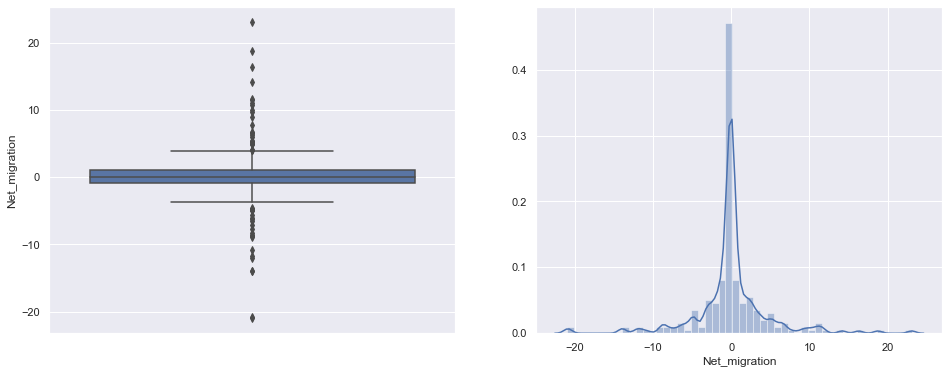

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(outliers, orient="vertical", ax=ax[0])
sns.distplot(outliers.dropna(), ax=ax[1])

In [95]:
def q5():
    q1 = outliers.quantile(0.25)
    q3 = outliers.quantile(0.75)
    iqr = q3 - q1

    interval_iqr = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
    outliers_down = int(outliers[outliers < interval_iqr[0]].count())
    outliers_up = int(outliers[outliers > interval_iqr[1]].count())
    threshold = bool((outliers_down + outliers_up)/outliers.shape[0] < 0.1)

    return outliers_down, outliers_up, threshold


q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [90]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [91]:
def q6():
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)

    return int(newsgroups_counts[:, count_vectorizer.vocabulary_['phone']].sum())


q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [92]:
def q7():
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroup.data)

    tfidf_df = pd.DataFrame(tfidf_vectorized[:].toarray(
    ), columns=np.array(tfidf_vectorizer.get_feature_names()))

    return float(np.round(tfidf_df["phone"].sum(), 3))


q7()

8.888